In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import re
import io

In [2]:
def readFile(file):
    with open(file,"r") as f:
        data = f.read()
        data = re.sub(' +\n','\n',data)
        data = re.sub(' +',',',data)

    return data

In [3]:
files = ['noint', 'normint','tb','pq','tbpq','ovstb','ovspq','ovstbpq','ovspq_swtb','ovstb_swpq']
files.reverse()
dfs = {}
for f in files:
    dfs[f]=pd.read_csv(io.StringIO(readFile(f)), sep=',')


In [4]:
types = dfs[files[0]]['Type'].unique()

In [5]:
typedata = {}

for type in types:
    for g in ['Duration(s)','Throughput(bytes/s)']:
        df = pd.DataFrame()
        for f in files:
            tmp = dfs[f][dfs[f]['Type'] == type][g]
            df[f] = tmp.reset_index(drop=True)
        typedata[type+" "+g] = df

In [6]:
    label_dict = {
            'noint':'No Interference',
            'normint':'Normally Distributed\nInterference',
            'tb':'Token Bucket on Switch',
            'pq':'Priority Queue on Switch',
            'tbpq':'Token Bucket & Priority Queue\non Switch',
            'ovstb':'Token Bucket on Host',
            'ovspq':'Priority Queue on Host',
            'ovstbpq':'Token Bucket & Priority Queue\non Host',
            'ovspq_swtb':'Priority Queue on Host\nToken Bucket on Switch',
            'ovstb_swpq':'Token Bucket on Host\nPriority Queue on Switch'
        }

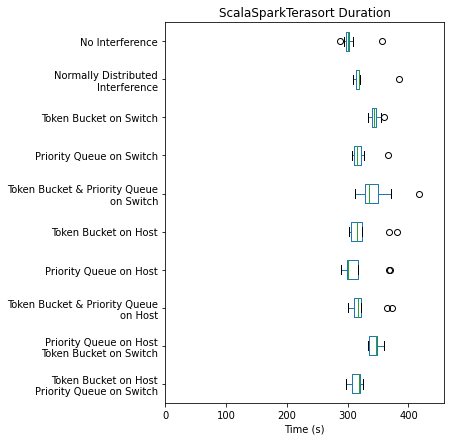

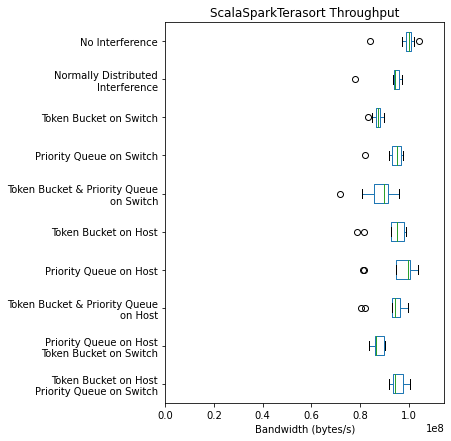

In [7]:
for type in types:
    for g in ['Duration(s)','Throughput(bytes/s)']:
        dat = typedata[type+" "+g]
        dat.rename(columns=label_dict, inplace=True)
        top = (dat.max(axis=1).max(axis=0))*1.1
        if top == 0:
            continue # no data, mainly used for non-bandwidth graphs, which are always 0
        ax = dat.boxplot(grid=False,rot=0,figsize=(5,7),vert=False)
        title = {
            'Duration(s)':'Duration',
            'Throughput(bytes/s)':'Throughput'
        }
        xlabel = {
            'Duration(s)':'Time (s)',
            'Throughput(bytes/s)':'Bandwidth (bytes/s)'
        }
        plt.title(type + ' ' + title[g])
        # plt.xlabel(xlabel[g])
        ax.set_xlabel(xlabel[g])
        plt.xlim(left=0,right=top)
        plt.savefig(title[g]+".png", bbox_inches="tight")
        plt.show()